<a href="https://colab.research.google.com/github/citrus1998/nlp100/blob/main/nlp100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2022-06-23 13:16:34--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.01s   

2022-06-23 13:16:34 (71.4 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

In [3]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [4]:
# Check the number of sentences
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [5]:
!pip install mecab-python3 unidic-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 19.8 MB/s 
     |████████████████████████████████| 47.4 MB 1.4 MB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=8be8429b794120b72ca04b6efd4755fc92658cc39a88ce0a53d5ec5e656e8429
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


# 30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
import MeCab

In [7]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, 'r', encoding='utf-8') as f:
  for l in f:
    if l not in 'EOS\n':
      spl_l = l.split('\t')
      if spl_l[0] != '':
        spl_cxt = spl_l[1].split(',')
        spl_cxt[-1] = spl_cxt[-1].replace('\n', '')
        morph = {'surface': spl_l[0], 'base': spl_cxt[6], 'pos': spl_cxt[0], 'pos1': spl_cxt[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

sentences = sentences[:2] + [m for m in sentences[2:] if len(m) != 0]
for i, m in enumerate(sentences[2]):
  print(m)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


#31.
動詞の表層形をすべて抽出せよ．

#32.
動詞の基本形をすべて抽出せよ．

#33.
2つの名詞が「の」で連結されている名詞句を抽出せよ．

#34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
def list2str(lst):
  return ''.join(lst)

In [17]:
def continue_word_counter(word, idx):
  continue_words = [word[idx]['surface']]
  while word[idx+1]['pos'] != '名詞':
    if word[idx+1]['pos'] != '名詞':
      break
    continue_words.append(word[idx+1]['surface'])
    idx += 1
  #return list2str(continue_words)
  return continue_words

In [20]:
result31 = []
result32 = []
result33 = []
result34 = []

for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] == '動詞':
      result31.append(m['surface'])
      result32.append(m['base'])

  for i in range(1, len(s) - 1):
    if s[i]['surface'] == 'の' and (s[i-1]['pos'] == '名詞' and s[i+1]['pos'] == '名詞'):
      #print(s[i-1]['surface'], s[i+1]['surface'])
      result33.append((s[i-1]['surface'], s[i+1]['surface']))
    
    if s[i]['pos'] == '名詞' and s[i+1]['pos'] == '名詞':
      #print(s[i]['surface'], s[i+1]['surface'])
      #result34.append((s[i]['surface'], s[i+1]['surface']))
      print(continue_word_counter(s, i))


result31 = set(result31)
result32 = set(result32)
result33 = set(result33)
result34 = set(result34)

ストリーミング出力は最後の 5000 行に切り捨てられました。
['一']
['分']
['マイナス']
['一']
['分']
['マイナス']
['三']
['分']
['四']
['二']
['二']
['二']
['廻']
['二']
['十']
['毛']
['一']
['手']
['人間']
['酔']
['暑中']
['休暇']
['張']
['胃弱']
['風呂']
['ざあざあ']
['一']
['今日']
['先生']
['苦']
['沙弥']
['隣']
['ワン']
['驚']
['扇']
['風呂']
['三']
['私']
['なん']
['沙弥']
['迷亭']
['君']
['ん']
['ざ']
['ホホホ']
['土用']
['あと']
['変']
['ちきり']
['希']
['牛肉']
['一']
['希']
['お話']
['希']
['希']
['希']
['——」「']
['あら']
['鍛冶']
['鍛冶']
['迷亭']
['支那']
['苦']
['沙弥']
['一']
['迷亭']
['——']
['誂']
['一つ']
['驚']
['欠伸']
['坐り']
['まま']
['寄木']
['巻煙草']
['一']
['君']
['横']
['ッ']
['突']
['帰']
['天']
['斎']
['君']
['事']
['心配']
['壊']
['まま']
['沙弥']
['価']
['迷亭']
['ケース']
['十']
['四']
['パナマ']
['好奇']
['厄']
['十']
['四']
['迷亭']
['三']
['日']
['ぷつりと']
['度']
['物']
['螺旋']
['釘']
['ん']
['ざあ']
['損']
['眼']
['覚']
['眼']
['眼']
['時']
['客']
['二']
['奥さん']
['なあに']
['辛']
['心配']
['むざと']
['二']
['奥さん']
['一']
['十']
['二']
['三']
['簀']
['さ']
['三']
['分']
['八']
['一']
['五']
['ゅうと']
['咽']
['一']
['二']
['度']
['迷亭']
['一']
['二']
['滴']
['眼']
['二']
['三']
['奥さん

In [9]:
print(result31)

{'聞え', 'さし', 'ある', '破れる', '張る', '思っ', 'とる', '掘っ', 'ふかし', '叫び', '追い詰め', '充たさ', '見渡す', '過ごす', '言わ', 'さげる', '抓み', '溺れ', '熱し', '突き戻す', '収めん', 'しらべ', '比べる', 'ちまお', '試みよ', '察せ', '吸い込ん', '仕立てる', '書く', 'たつ', '出逢え', '面し', 'してやれ', '逆上せん', '及ぶ', '号する', '択ば', '滑ら', '奏し', 'ほてる', 'まじない', 'づけ', '抱く', 'いに', 'つくす', '考え直し', '飾っ', '務める', '仰ぐ', 'かなう', '成し', '苦しめん', '復する', '片付け', 'ふさい', 'しゃがん', '出張っ', '感じ', '鳴かせる', '重んぜ', 'でき', '嚇し', '起こさ', '冠せ', '構っ', '卸せ', '巡り', 'おり', 'けりゃ', '割っ', '開け放っ', '叩か', 'やり', 'つら', '生き', 'くらさ', '走る', '撫でる', '翳し', '敷い', '申し渡し', '着く', 'ほてっ', '見廻し', '覆う', '達し', 'れよ', '見捨て', '取り出し', 'よべ', '通う', '称し', 'そそのかし', '為す', '洗え', '押し通そ', '滑れ', '見合せ', '魂消る', '知れ', '滑べっ', '呑み', '動き', '怒る', 'しゃべり', '立ち入っ', 'とまら', '凝っ', '埋', 'つかまっ', '差しかかっ', '取り払う', '括っ', 'こか', '申し込ん', '仕上がっ', '通り', '覚し', '整え', '恥ずる', '捕り', 'せろ', '装っ', '減れ', '作ろ', '立ち至り', '下げる', '怒', 'ち', '思い込ん', '動け', 'したがっ', 'のせ', '溜まっ', '叶っ', '戒め', '解く', '砕ける', 'かしこまる', 'とりのけ', '寄せ', '伺っ', '斬り', '思いやら', '盗ら', 'ぱくつく', '綻び', '妨げ', '見つかれ', '詠ん', 

In [10]:
print(result32)

{'破れる', 'ある', 'したがう', '立ち去る', 'とる', '張る', '見渡す', '過ごす', 'とりとめる', '書き流す', 'さげる', '凹む', '突き戻す', '比べる', '仕立てる', '褪める', '書く', 'たつ', 'からまる', '及ぶ', '号する', '分つ', 'ほてる', '爛れる', '抱く', '見捨てる', '引き付ける', 'つくす', '取り出す', 'ひそめる', '務める', '終える', '出会う', '仰ぐ', 'くるむ', 'かなう', '復する', '被う', '鳴かせる', '納める', '吸う', '産まれる', '急き込む', '走る', '撫でる', '着く', '陣取る', '覆う', '通う', 'つくばう', '拱く', '為す', '魂消る', '聳やかす', 'はらう', '怒る', '崇める', 'あきれ返る', '取り払う', '躍り出る', '砕く', '奉じる', '下げる', '競う', '助かる', 'ききつける', '解く', '砕ける', '書きつける', 'かしこまる', '仕損じる', 'もとめる', 'ぱくつく', '焦る', '褒める', '発す', '逐う', '晴れ渡る', 'あらそう', '小突く', 'くるまる', '捌ける', '変じる', 'つくろう', '気づかう', '限る', '休む', '見習う', 'つきつける', '飾り付ける', 'くずれる', '避ける', '打ちつける', '掠める', '放つ', '持ち出す', '蓄える', '休める', '萌す', '立つ', 'すく', '聞き及ぶ', 'すすめる', '求む', 'たどる', '稼ぐ', '点じる', '適す', '浮かぶ', '建つ', 'じらす', '渡す', 'じゃれる', '呼びつける', '行く', '参らせる', '仰せつける', 'つくる', '合せる', '縫う', '降す', '洒落れる', '祟る', 'ひっくり返す', '重なる', 'ける', '使いこなせる', 'とばす', '据える', '叩き込む', 'にたてる', '目だつ', '取りつく', '売る', '伝う', '怠る', '延べる', 'ごまかす', '歌う', '跳ね返る', 

In [11]:
print(result33)

{('彼', '悟り'), ('うち', '猫'), ('事件', '諾否'), ('巻煙草', '吸い殻'), ('欄干', '上'), ('今', '音'), ('学校', '事'), ('人間', '歴史'), ('以上', '学校'), ('正成', '甲'), ('長吉', '方'), ('おやじ', '鼻'), ('登り', '一'), ('むき出し', 'まま'), ('麓', '方'), ('輪', '花'), ('鏡花', '小説'), ('主人', '家'), ('尻尾', '先'), ('悲壮', '音'), ('国', '国民'), ('書斎', 'うち'), ('人口', '増殖'), ('尊敬', '意'), ('軍鶏', '蹴合い'), ('近所', 'ゴロ'), ('ヴァイオリン', '仲間入り'), ('当時', 'まま'), ('自分', '名前'), ('自分', '頭'), ('供', '寝床'), ('上', '公式'), ('学校', '先生'), ('顔', '造作'), ('白髪', 'チョン'), ('御存じ', '事'), ('相思', '煙'), ('供', '袖'), ('脳', '作用'), ('猫', '春'), ('婦人', '礼服'), ('男爵', 'よう'), ('丁目', '角'), ('前', 'こと'), ('人', 'じじい'), ('金田', '鼻'), ('吾輩', '背中'), ('沢山', 'うち'), ('令嬢', '方'), ('男', '着物'), ('煙草', '火'), ('主人', '我儘'), ('例', '鉄扇'), ('一枚岩', '上'), ('例', '蠅'), ('営養', '不足'), ('満身', '力'), ('戦争', '人質'), ('まあ', '中'), ('軍隊', '歓迎'), ('怒り', '記号'), ('竈', '蓋'), ('妙齢', '女子'), ('自然', '傾向'), ('他', '一端'), ('良人', '肩'), ('主人', 'ため'), ('類似', '点'), ('戸', '潜り'), ('教場', '経験'), ('様', '何とか'), ('研究', 'ため'), ('トチメンボー', '亡魂'), ('之', 

In [18]:
print(result34)
print(len(result34))

{('こと', '出馬'), ('結婚', '論'), ('人間', '諸君'), ('大分', '放蕩'), ('文人', '画'), ('眼', '口'), ('例', 'の'), ('力学', '的'), ('鴨', '南蛮'), ('十', '銭'), ('ため', '沢庵'), ('校長', 'さん'), ('三', '句'), ('軒', '両隣'), ('二', '割'), ('ため', '大地'), ('の', '何'), ('物', '顔'), ('右', '発見'), ('睡眠', '剤'), ('君', '遊び'), ('形骸', '以外'), ('聟', 'さん'), ('蒲鉾', '町'), ('金田', '君'), ('四', '梃'), ('三', '毛'), ('大分', '見聞'), ('的', '分子'), ('八雲', '先生'), ('以来', '今日'), ('臨済', '録'), ('飯', '茶'), ('そげん', '頑固'), ('樽', '金'), ('紛然', '雑然'), ('的', '猫'), ('——', '甘木'), ('一銭', '銅貨'), ('寄り', '合'), ('八', '畳'), ('末', 'おやじ'), ('鈍', '瞎漢'), ('一遍', '牛肉'), ('四つ', '目垣'), ('時', '妙'), ('天道', '公平'), ('書斎', '中'), ('先', 'きの'), ('上', '候'), ('野蛮', '的'), ('生命', '財産'), ('只', '管'), ('君', '帽子'), ('政治', '家'), ('多妻', '主義'), ('あら', 'いや'), ('先', 'どこ'), ('展覧', '場'), ('みんな', '一'), ('いや', '身分'), ('時', 'ゃ'), ('さ', 'よう'), ('依頼', '通り'), ('ん', 'ざどうだって'), ('何', 'ヵ月'), ('——', '御酒'), ('目下', '文明'), ('そ', 'ー'), ('二', '階'), ('顔面', '神経'), ('三', '品'), ('一室', '内'), ('消化', '機能'), ('本', '足'), ('寄宿舎', '時代'

# 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [20]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic:
  print(k, ':', v)

の : 9194
て : 6848
は : 6420
に : 6243
を : 6071
だ : 5972
と : 5508
が : 5337
た : 4267
する : 3657


#36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [21]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 24.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=153aa7866c2bb7631e8c094b6030e0cb7294bd2f267cd26ce5cc7ca5ed2ba892
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


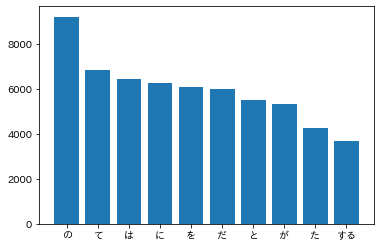

In [26]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()